<img src="../gcd.png" align="right" style="float" width="100">
<img src="../logo_UV.jpg"  align="right" style="float" width="200">



<font color="#CA3532"><h1 align="left">Degree in Data Science.</h1></font>
<font color="#6E6E6E"><h2 align="left">Lab Session 5. Ensembles: Bagging for Classification, Regression and Random Forest.</h2></font> 



#### Miguel Ángel Fernández Torres, Yolanda Vives Gilabert, Álvaro Moreno Martínez, Marcelino Martínez Sober




When using *ensemble* methods, the final model is the combination of different individual models, which outperforms the individual models. Ensembles can be composed of models of the same or different type, but it should be noted that these models should be complementary, i.e., low correlated between them. To combine the different models in an ensemble, the majority vote is used for classification, while a centralisation metric as the average value is used for regression.

In this lab session we will train and evaluate *ensembles* of decision trees. Decision trees, which are unstable individually (a little change in the dataset can change significantly their performance), become more stable with *ensembles*.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Bagging for classification

There are different ways of generating ensembles (majority vote, *bagging, boosting*...). In this session we will study the *bagging* approach, which involves training each model with subsets from the training set. These subsets are obtained by randomly choosing (with replacement) samples from the training set.

You can find more information about the *bagging* implementation for classification available in sklearn using the following link:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

#### Example with a toy database

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_checkerboard
from sklearn.datasets import load_iris, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import mode

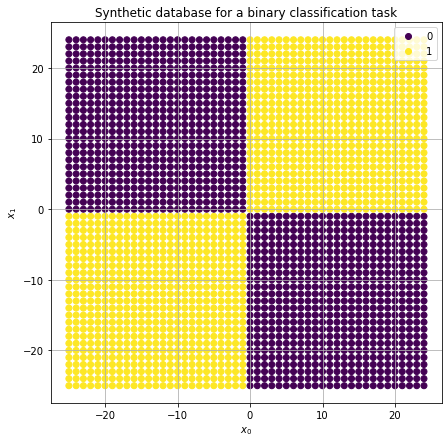

In [3]:
# Read and show dataset(s)

N = 50
X = np.arange(N) - N/2
x1, x2 = np.meshgrid(X, X)
X = np.c_[x1.ravel(), x2.ravel()]
y = np.zeros(N * N)
y[(X[:,0] >= 0) * (X[:,1] >= 0 )] = 1
y[(X[:,0]  < 0) * (X[:,1]  < 0 )] = 1

#Convertimos a entero, clase 0 y clase 1
y=y.astype('int')

fig,ax = plt.subplots(figsize=(7,7))
sc=ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('Synthetic database for a binary classification task')

h, l = sc.legend_elements()
ax.legend(h,np.unique(y)), plt.grid(1);


In [4]:
# Model setup, decision tree
clasificador = DecisionTreeClassifier
criterion = 'entropy'
max_depth = 2  # 1  # None  # 2
#Use metrics.classification_report function to evaluate the classifier
report = metrics.classification_report

In [5]:
# Divide into training and test sets
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=6)

#### Classification using only one decision tree

In [6]:
# Create a single predictor (for reference)
tree = clasificador(criterion=criterion, max_depth=max_depth, random_state=0)
# Train / prediction of single predictor
tree.fit(Xtr, ytr)
yp = tree.predict(Xts)
print('Res tree:', report(yts, yp))

Res tree:               precision    recall  f1-score   support

           0       0.52      0.59      0.55       356
           1       0.58      0.50      0.54       394

    accuracy                           0.55       750
   macro avg       0.55      0.55      0.55       750
weighted avg       0.55      0.55      0.54       750



#### Classification using bagging

**Exercise.** Generate a forest using many decision trees, e.g., 100 trees.

1. Choose how many trees the forest will have and store this value in the variable `T`.
2. Create a variable called `bag`, which is a list to store all the decision trees.
3. Use a for loop to iteratively train all the decision trees, given a randomly subset of the training data. To this end, use the `resample` function.
4. Store each trained decision tree at each iteration in the variable ``bag``.

In [7]:
# Set the number of trees
T = 100

# Create a list to store decision trees
bag = []

# Create and train the forest
for _ in range(T):
    Xtr_sub, ytr_sub = resample(Xtr, ytr, replace=True, random_state=_)
    tree = clasificador(criterion=criterion, max_depth=max_depth, random_state=0)
    tree.fit(Xtr_sub, ytr_sub)
    bag.append(tree)

**Exercise.** Obtain the predictions for the test subset by considering the mode value (majority vote). To this end, use the "mode" function in Scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html).

In [8]:
y_pred_forest = np.array([tree.predict(Xts) for tree in bag])
y_pred_majority = mode(y_pred_forest, axis=0).mode.ravel()
print('Random Forest:', report(yts, y_pred_majority))

Random Forest:               precision    recall  f1-score   support

           0       0.87      0.97      0.92       356
           1       0.97      0.87      0.92       394

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750



/var/folders/yy/_wvn17yd64b4l3kf2w95h37r0000gn/T/ipykernel_2382/2829336489.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_majority = mode(y_pred_forest, axis=0).mode.ravel()


**Exercise.** Represent the distribution of votes given the forest using the `hist` function and considering 20 bins. Compare the histograms obtained for each class.

/var/folders/yy/_wvn17yd64b4l3kf2w95h37r0000gn/T/ipykernel_2382/2040310831.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  for idx, classyfication in enumerate(mode(y_pred_forest, axis=0)[0][0]):
/var/folders/yy/_wvn17yd64b4l3kf2w95h37r0000gn/T/ipykernel_2382/2040310831.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

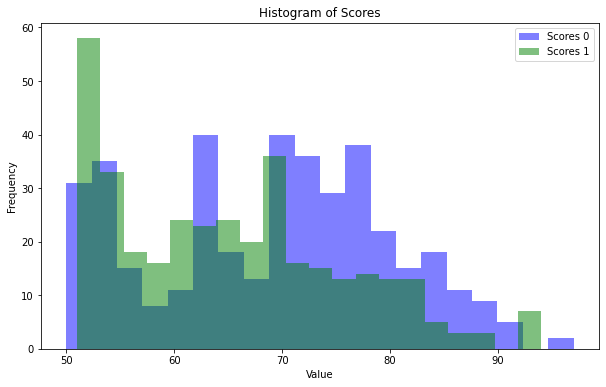

In [9]:
scores0 = []
scores1 = []

for idx, classyfication in enumerate(mode(y_pred_forest, axis=0)[0][0]):
    if classyfication == 0:
        scores0.append(mode(y_pred_forest, axis=0)[1][0][idx])
    else:
        scores1.append(mode(y_pred_forest, axis=0)[1][0][idx])
    
plt.figure(figsize=(10, 6))

plt.hist(scores0, bins=20, alpha=0.5, label='Scores 0', color='blue')
plt.hist(scores1, bins=20, alpha=0.5, label='Scores 1', color='green')

plt.title('Histogram of Scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Here below the implementation using sklearn is provided.

In [10]:
# Usando el bagging de sklearn
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=clasificador(criterion=criterion, \
                        max_depth=max_depth), n_estimators=100)
bc.fit(Xtr, ytr)
yc = bc.predict(Xts)
print('Random Forest:', report(yts, yc))

Random Forest:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       356
           1       0.99      0.99      0.99       394

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



**Exercise.** Compare the results obtained using 1) only one tree, 2) bagging without and 3) bagging with sklearn. Which approach provides the best performance?

Subsequently presented methods obtain better and better results. The method from the sklearn library achieves the best results

**Exercise.** Evaluate the algorithm (use the `metrics.accuracy_score` metric) for a different number of trees and represent the accuracy obtained depending on the number of trees. What happens with the accuracy when the number of trees increases? Hint: Consider from 1 to 100 trees in the forest.

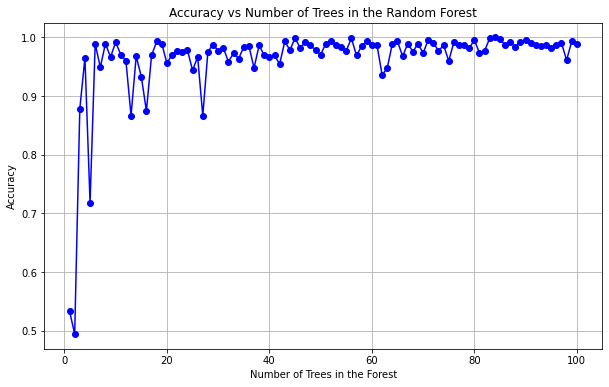

In [11]:
from sklearn.metrics import accuracy_score

accuracy_scores = []
for i in range(1, 101):
    bc = BaggingClassifier(base_estimator=clasificador(criterion=criterion, \
                            max_depth=max_depth), n_estimators=i)
    bc.fit(Xtr, ytr)
    yc = bc.predict(Xts)
    accuracy = accuracy_score(yts, yc)
    accuracy_scores.append(accuracy)
    #print(f'{i}: {accuracy_bagging_with}')
    
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 101), accuracy_scores, marker='o', linestyle='-', color='b')
ax.set_xlabel('Number of Trees in the Forest')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Number of Trees in the Random Forest')
plt.grid(True)
plt.show()

### Bagging for regression

You can find more information about the implementation of *bagging* for regression available in sklearn in the following link:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston, load_diabetes, load_linnerud
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import mode as moda

We generate a toy dataset using the *sinc* function from the previous lab session.

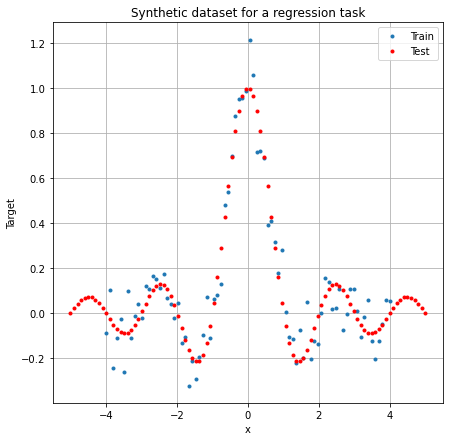

In [13]:
#Generate a sinc....

X = np.linspace(-5, 5, 100)[:, None]
y = np.sinc(X)

# Add noise in the training data
pcut = 4
noise = 0.1
Xtr = X[(-pcut <= X) & (X <= pcut)][:, None]
ytr = y[(-pcut <= X) & (X <= pcut)][:, None]
ytr = ytr + noise * np.random.randn(ytr.shape[0], 1)
Xts = X; yts = y


fig,ax = plt.subplots(figsize=(7,7))
ax.plot(Xtr, ytr, '.')
ax.plot(Xts, yts, 'r.')
ax.set_xlabel('x')
ax.set_ylabel('Target')
ax.set_title('Synthetic dataset for a regression task')
ax.legend(['Train','Test'])
plt.grid(1);

**Exercise.** Train and predict using a decision tree for regression and the 'squared_error' criterion. Plot the results obtained.

In [14]:
# Define the decision tree for regression using the 'squared_error' criterion
predictor = DecisionTreeRegressor
criterion = 'squared_error'
max_depth = None
report = metrics.mean_squared_error

In [15]:
tree = predictor(criterion=criterion, max_depth=max_depth, random_state=0)
tree.fit(Xtr, ytr)
yp = tree.predict(Xts)

print('Mean Squared Error:', report(yts, yp))

Mean Squared Error: 0.009130963122701986


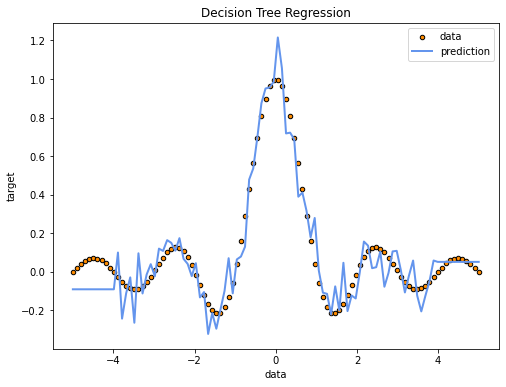

In [16]:
# Plot the prediction results for the test subset
plt.figure(figsize=(8, 6))
plt.scatter(Xts, yts, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Xts, yp, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

**Exercise.** Create a forest using 200 decision trees. Plot the results obtained. Which model has the best performance, the tree or the forest? Implement the model both using sklearn and a for loop. Remember, when using the for loop, that now the criterion for the regression prediction is the average value and not the mode (majority vote) as in classification.

The tree has almost twice as bad a result as both forests. The built-in forest obtained a minimally larger square error than the one created in the loop.

In [17]:
# USING A FOR LOOP
num_trees = 200
forest = []

for _ in range(num_trees):
    Xtr_sub, ytr_sub = resample(Xtr, ytr, replace=True, random_state=_)
    tree = DecisionTreeRegressor(criterion='squared_error', max_depth=None, random_state=0)
    tree.fit(Xtr_sub, ytr_sub)
    
    forest.append(tree)
    
yp_forest_loop = np.mean([tree.predict(Xts) for tree in forest], axis=0)

mse_forest_loop = metrics.mean_squared_error(yts, yp_forest_loop)
print('Random Forest (For Loop) Mean Squared Error:', mse_forest_loop)

Random Forest (For Loop) Mean Squared Error: 0.004547918790665534


In [18]:
# USING THE SKLEARN FUNCTION

from sklearn.ensemble import RandomForestRegressor

ytr_1d = np.ravel(ytr)
forest_sklearn = RandomForestRegressor(n_estimators=num_trees, criterion='squared_error', random_state=0)
forest_sklearn.fit(Xtr, ytr_1d)
yp_forest_sklearn = forest_sklearn.predict(Xts)

mse_forest_sklearn = metrics.mean_squared_error(yts, yp_forest_sklearn)
print('Random Forest (Sklearn) Mean Squared Error:', mse_forest_sklearn)

Random Forest (Sklearn) Mean Squared Error: 0.005055956131072956


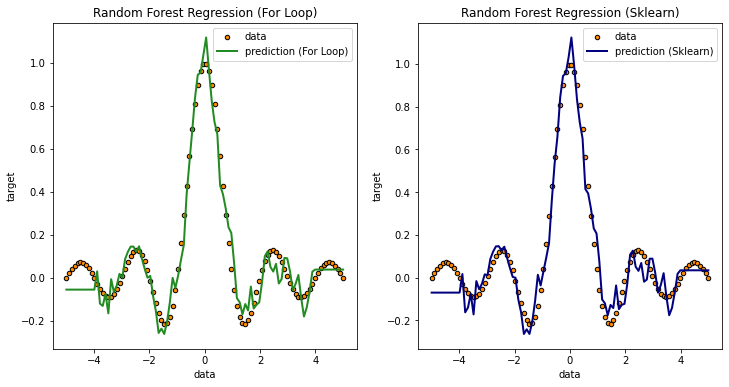

In [19]:
plt.figure(figsize=(12, 6))

# Plot results from the for loop
plt.subplot(1, 2, 1)
plt.scatter(Xts, yts, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Xts, yp_forest_loop, color="forestgreen", label="prediction (For Loop)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression (For Loop)")
plt.legend()

# Plot results from sklearn
plt.subplot(1, 2, 2)
plt.scatter(Xts, yts, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Xts, yp_forest_sklearn, color="navy", label="prediction (Sklearn)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression (Sklearn)")
plt.legend()

plt.show()

**Exercise.** Plot and compare the results obtained with 1) only one tree and 2) the forest. Plot also the coefficient of determination $R^2$ using the `r2_score` function in sklearn. 

Single Decision Tree R^2: 0.8943171580855873
Random Forest R^2: 0.9473618526178796


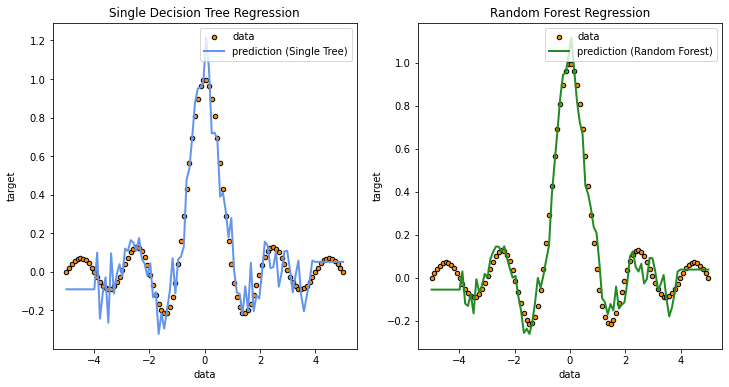

In [20]:
from sklearn.metrics import r2_score

r2_tree = metrics.r2_score(yts, yp)
print('Single Decision Tree R^2:', r2_tree)

yp_forest = np.mean([tree.predict(Xts) for tree in forest], axis=0)
r2_forest = metrics.r2_score(yts, yp_forest)
print('Random Forest R^2:', r2_forest)

plt.figure(figsize=(12, 6))

# Plot results from the single decision tree
plt.subplot(1, 2, 1)
plt.scatter(Xts, yts, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Xts, yp, color="cornflowerblue", label="prediction (Single Tree)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Single Decision Tree Regression")
plt.legend()

# Plot results from the random forest
plt.subplot(1, 2, 2)
plt.scatter(Xts, yts, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Xts, yp_forest, color="forestgreen", label="prediction (Random Forest)", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()

plt.show()

**Exercise.** Represent the predictions vs. the target values for the three approaches. Plot a straight line with slope=1 to represent target values vs. target values as a reference to evaluate the model performance.

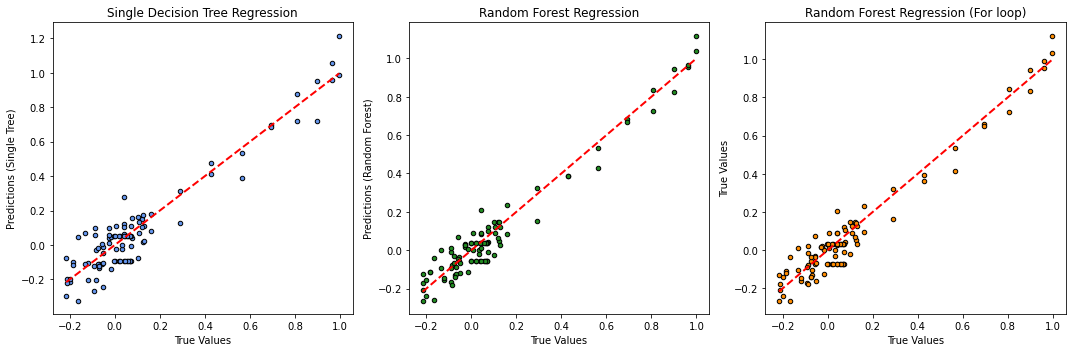

In [21]:
plt.figure(figsize=(15, 5))

# Plot results from the single decision tree
plt.subplot(1, 3, 1)
plt.scatter(yts, yp, s=20, edgecolor="black", c="cornflowerblue")
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color='red', linestyle='--', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions (Single Tree)")
plt.title("Single Decision Tree Regression")

# Plot results from the random forest
plt.subplot(1, 3, 2)
plt.scatter(yts, yp_forest, s=20, edgecolor="black", c="forestgreen")
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color='red', linestyle='--', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions (Random Forest)")
plt.title("Random Forest Regression")

# Plot results from the straight line
plt.subplot(1, 3, 3)
plt.scatter(yts, yp_forest_sklearn, s=20, edgecolor="black", c="darkorange")
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color='red', linestyle='--', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("True Values")
plt.title("Random Forest Regression (For loop)")

plt.tight_layout()
plt.show()


### Random Forest

Random Forests are defined as an ensemble of decision trees combined usingbagging. For each node:

1. $m$ variables are randomly chosen from the $M$ variables available.
2. The best separation/threshold is obtained using only these $m$ variables.

Decision trees are built up to their maximum depth.

Predictions for unseen data are obtained as in the previous bagging exercises: majority vote for classification and average value for regression.

In this section we will apply Random Forest for regression. You can find more information about its implementation in sklearn in the following link:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston, load_diabetes, load_linnerud
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import mode as moda

Apply Random Forest using the diabetes database.

In [23]:
# Preparamos datos... 
X, y = load_diabetes(return_X_y=True)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

**Exercise.** Implement the Random Forest algorithm and obtain the predictions on the test set. It is equal to bagging but limiting the number of features (max_features) used in each node to make the decision, which are now randomly chosen.

- max_features = "sqrt" is often used for regression.
- max_features = "log2" is often used for classification.

In [24]:
predictor = DecisionTreeRegressor
# predictor = LinearRegression
criterion = 'squared_error'
max_depth = None
max_features = "sqrt"
report = metrics.mean_squared_error

In [25]:
## Only one decision tree

tree = predictor(criterion=criterion, max_depth=max_depth, max_features=max_features, random_state=0)
tree.fit(Xtr, ytr)
yp_tree = tree.predict(Xts)

mse_tree = report(yts, yp_tree)
print('Single Decision Tree Mean Squared Error:', mse_tree)

Single Decision Tree Mean Squared Error: 6273.812030075188


In [26]:
# Train bagging ensemble
# T = number of trees
# bag  variable to store the trees (for ex., a list)
# loop for the number of trees
#    resample(X, Y, replace=True)

T = 100
bag = []

for _ in range(T):
    Xtr_sub, ytr_sub = resample(Xtr, ytr, replace=True, random_state=_)
    tree = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, \
                                 max_features=max_features, random_state=0)
    
    tree.fit(Xtr_sub, ytr_sub)
    bag.append(tree)

yp_bagging = np.mean([tree.predict(Xts) for tree in bag], axis=0)
mse_bagging = report(yts, yp_bagging)
print('Random Forest (Bagging) Mean Squared Error:', mse_bagging)

Random Forest (Bagging) Mean Squared Error: 3782.498368421053


**Exercise.** Implement Random Forest algorithm using sklearn and compare the error obtained with that provided by only one tree.

In [28]:
n_estimators = 100
random_forest = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, \
                                      max_depth=max_depth, max_features=max_features)
random_forest.fit(Xtr, ytr)
y_pred_forest = random_forest.predict(Xts)
mse_forest = report(yts, y_pred_forest)

print(f'Mean Squared Error (Random Forest): {mse_forest}')

Mean Squared Error (Random Forest): 4077.5972812030072


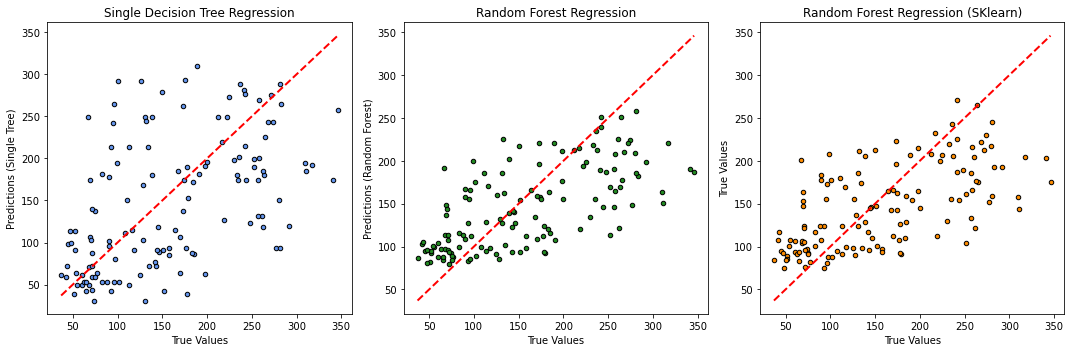

In [29]:
plt.figure(figsize=(15, 5))

# Plot results from the single decision tree
plt.subplot(1, 3, 1)
plt.scatter(yts, yp_tree, s=20, edgecolor="black", c="cornflowerblue")
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color='red', linestyle='--', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions (Single Tree)")
plt.title("Single Decision Tree Regression")

# Plot results from the random forest
plt.subplot(1, 3, 2)
plt.scatter(yts, yp_bagging, s=20, edgecolor="black", c="forestgreen")
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color='red', linestyle='--', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions (Random Forest)")
plt.title("Random Forest Regression")

# Plot results from the straight line
plt.subplot(1, 3, 3)
plt.scatter(yts, y_pred_forest, s=20, edgecolor="black", c="darkorange")
plt.plot([min(yts), max(yts)], [min(yts), max(yts)], color='red', linestyle='--', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("True Values")
plt.title("Random Forest Regression (SKlearn)")

plt.tight_layout()
plt.show()

**Exercise.** Determine what is the purpose of the following parameters:

* n_estimators
* max_depth 
* max_features
* bootstrap 

Try to implement any "grid search" strategy at home by validating the values for these parameters, to achieve an unbeatable model!

In [34]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_regressor = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)

# Print results
print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 150}
Mean Squared Error on Test Set: 2841.8486329690895
